<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

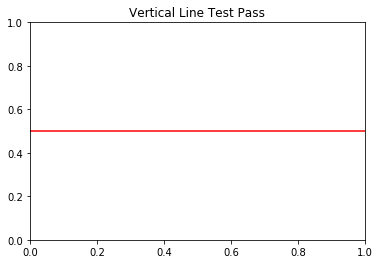

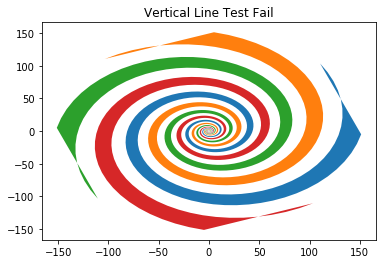

In [2]:
import matplotlib.pyplot as plt

# VLT pass
output_vector = [1, 3]
# Plot the Vectors
plt.axhline(y=0.5, color='r', linestyle='-')
plt.title("Vertical Line Test Pass")
plt.show()
#VLT FAIL
theta = np.arange(0, 8*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)


plt.title("Vertical Line Test Fail")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because there are resulting possible solutions/ products of the function

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 has no reused y values that would make it ambiguous

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

3.1.a. 3d input and 4d output
3.2.b 4d input and 2d output




## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, but there is no information on the size of the 3rd dimension so the function must be bound in the space and not span its ....volume but only an area in the dimension, I guess.
𝑓(𝑎𝑥)=(𝑎𝑥,𝑎𝑥)=𝑎(𝑥,𝑥)=𝑎𝑓(𝑥)
𝑓(𝑥+𝑦)=(𝑥+𝑦,𝑥+𝑦)=(𝑥,𝑥)+(𝑦,𝑦)=𝑓(𝑥)+𝑓(𝑦)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
p = np.array([
    [1,3],
    [2,-1]
])
    
q = np.array([
    [4, 1, 2],
    [2,-1,3],
    [5, -2, 1]
])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [4]:
t1 = np.array([2,2])
t2 = np.array([2,2,2]) 
test_p = np.matmul(t1, p)
print(test_p)
test_q = np.matmul(t2, q)
print(test_q)

[6 4]
[22 -4 12]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

They are vectors in a transformation that do not change orientation but only grow or shrink in thier span

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

High dimensional data is expensive to calculate, usually not easy to visualize, and loaded with possible redundant data that does not actually add rich contex information.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5 times the observations as you have parameters or features. Some would argue the squared some, depending on your expected output or model.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [5]:
import seaborn as sns
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()
df.isna().sum()
label = df.species
df = df.drop('species', axis=1)
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
98,5.1,2.5,3.0,1.1
135,7.7,3.0,6.1,2.3
116,6.5,3.0,5.5,1.8
115,6.4,3.2,5.3,2.3
124,6.7,3.3,5.7,2.1
38,4.4,3.0,1.3,0.2
31,5.4,3.4,1.5,0.4
86,6.7,3.1,4.7,1.5
78,6.0,2.9,4.5,1.5
71,6.1,2.8,4.0,1.3


In [6]:
# PCA subtract the mean, divide by std, 
v_list = ['sepal_length','sepal_width','petal_length','petal_width']
for v in v_list:     
  df[v] = (df[v] - df[v].mean())/df[v].std()
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.457168e-15,-1.722511e-15,-2.043551e-15,-9.843977e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.430844e+00,-1.563497e+00,-1.439627e+00
25%,-8.976739e-01,-5.858010e-01,-1.223442e+00,-1.177559e+00
50%,-5.233076e-02,-1.245404e-01,3.351431e-01,1.327811e-01
75%,6.722490e-01,5.673506e-01,7.602119e-01,7.879511e-01
max,2.483699e+00,3.104284e+00,1.780377e+00,1.705189e+00


In [7]:
dataset = np.array(df)
cov_matrix = np.cov(dataset, rowvar = False)
cov_matrix

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [8]:
values, vectors = np.linalg.eig(cov_matrix)
print(f"These are the Values: {values}")
print("\n These are the Vectors\n",vectors)

These are the Values: [2.91081808 0.92122093 0.14735328 0.02060771]

 These are the Vectors
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [13]:
P = vectors.T.dot(dataset.T)
print("\n Projected Data Sample: \n", P.T)


 Projected Data Sample: 
 [[-2.25698063e+00 -5.04015404e-01 -1.21536190e-01  2.29962838e-02]
 [-2.07945912e+00  6.53216394e-01 -2.26492063e-01  1.02863642e-01]
 [-2.36004408e+00  3.17413945e-01  5.13077379e-02  2.77323192e-02]
 [-2.29650366e+00  5.73446613e-01  9.85303586e-02 -6.60900544e-02]
 [-2.38080159e+00 -6.72514411e-01  2.13563034e-02 -3.72724209e-02]
 [-2.06362348e+00 -1.51347827e+00  3.05818064e-02  4.38408784e-03]
 [-2.43754534e+00 -7.43137171e-02  3.41055070e-01 -3.79693659e-02]
 [-2.22638327e+00 -2.46787172e-01 -8.22987560e-02 -2.54200029e-02]
 [-2.33413810e+00  1.09148977e+00  1.53049668e-01 -2.67043670e-02]
 [-2.18136797e+00  4.47131117e-01 -2.45736283e-01 -3.97740567e-02]
 [-2.15626287e+00 -1.06702096e+00 -2.63127870e-01  1.52500486e-02]
 [-2.31960686e+00 -1.58057946e-01  9.98311719e-02 -1.34104994e-01]
 [-2.21665672e+00  7.06750478e-01 -2.22469221e-01  2.62183044e-03]
 [-2.63090249e+00  9.35149145e-01  1.88937073e-01 -1.93571700e-02]
 [-2.18497165e+00 -1.88366805e+00 -

In [10]:
plt.scatter(P)

TypeError: ignored

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)